In [1]:
#Second part of the assignment comparing and contrasting Cao figures

- 10% A clear and concise overview of how to load CAO points information from the
CAO website into a pandas data frame [4], pitched as your classmates.


- 20% A detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in pandas.

- 10% Appropriate plots and other visualisations to enhance your notebook for viewers

In [2]:
import math #importing math
import numpy as np #importing numpy library
import pandas as pd #importing pandas library
import requests as rq #dealing with http requests
import re #importing the regular expression package
import datetime as dt #importing dates and times
import sklearn.neighbors as nei #predictive library (K-neighbour)
import seaborn as sns 
import urllib.request as urlrq #helping to import data

In [3]:
#cao_2021 = pd.read_excel('http://www2.cao.ie/points/l8.php')

# Cao Points 2021

<br>

***

In [4]:
req = rq.get('http://www2.cao.ie/points/l8.php')

In [5]:
req #calling the req, 200 is considered as everything worked. 404 broken

<Response [200]>

In [6]:
# req.text #to view what has been imported from the html *taking up so much room so # out for awhile. 

In [7]:
# this also             for line in req.iter_lines(): #asking to iliterate through each line of the data set
    #print (line) #view

In [8]:
now = dt.datetime.now() #calling todays date and time Timestamp
print(now)

nowstring = now.strftime('%Y%m%d_%H%M%S') #formating as a string

2021-12-27 07:29:08.481656


In [9]:
path = 'data/cao2021_'+ nowstring + '.html' #creating a new path for original, so that we always have a copy of the original.

In [10]:
req.encoding #checking which encoding was used

'iso-8859-1'

In [11]:
original_encoding = req.encoding #as the server used the wrong encoding a new variable was created, original.

In [12]:
req.encoding = 'cp1252' #changing the encoding to cp1252

In [13]:
with open (path, 'w') as f:
    f.write(req.text)

In [14]:
re_course =re.compile(r'([A-Z]{2}[0-9]{3})(.*)([0-9]{3})(\*?) *') #compile regular expressions for matching lines

In [15]:
path = 'data/cao2021_csv'+ nowstring + '.`csv' 

no_of_lines = 0

with open(path, 'w') as f:
    for line in req.iter_lines():
        dline = line.decode ('cp1252')
        if re_course.fullmatch(dline):
            no_of_lines = no_of_lines +1
            #csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
            linesplit =re.split(' +' , dline)
            # print(','.join(linesplit))
            f.write(','.join(linesplit) +'\n')
            
            
    
print(f"Total number of lines produced: ", no_of_lines)


Total number of lines produced:  922


In [16]:
#df = pd.read_csv("http://www2.cao.ie/points/l8.php")

# Do checks to compare the 922 courses to what we have.

- I was able to locate a spreedsheet copy and chrome gave me the ability to download the Data into excel. In the real world, I would probably have saved the excel file and worked with that.

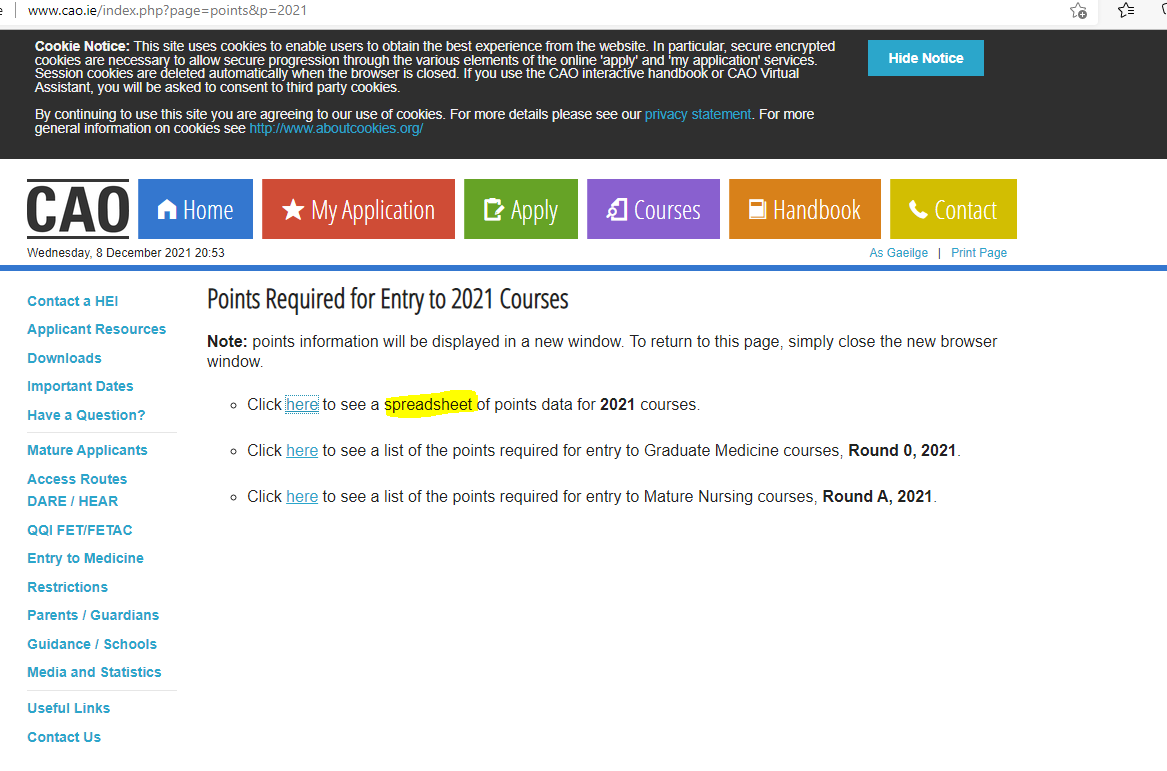

- So I quickly did a distict count on the level 8 course which produced 1034 courses. Therefore the numbers arent matching!

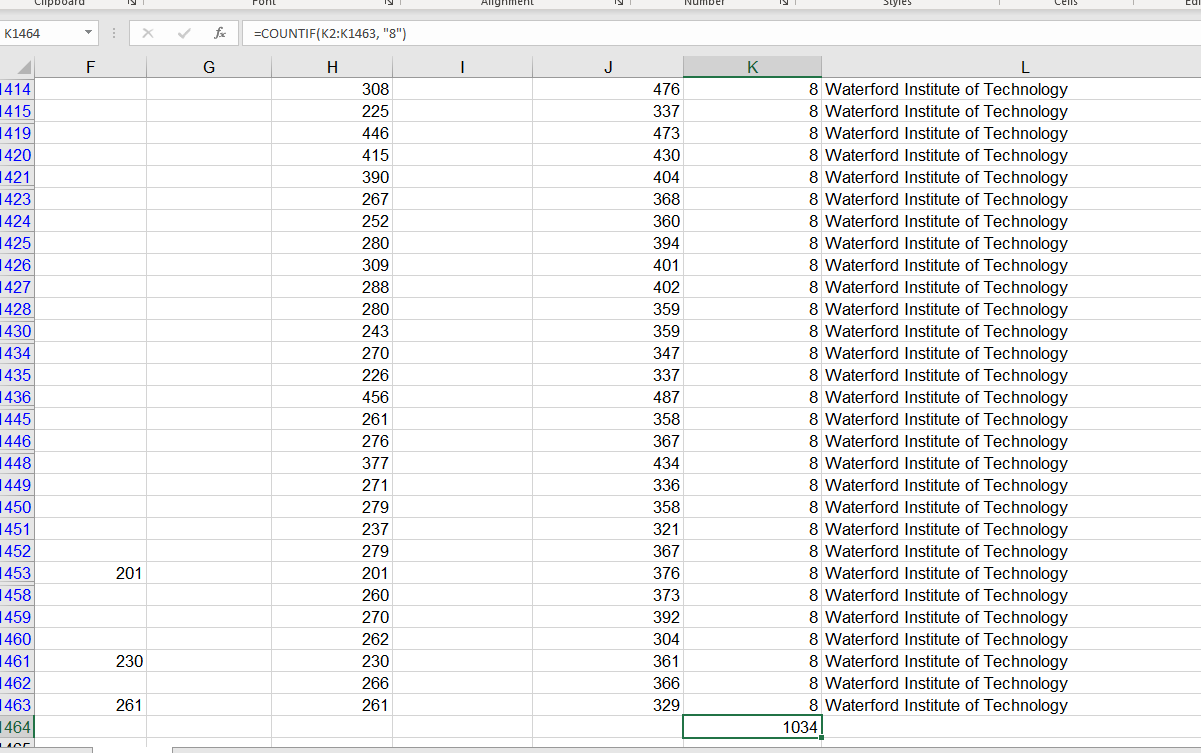



# Cao Points 2020

<br>

***

In [17]:
path = 'data/cao2020_' + nowstring +' .xlsx' #creating a path for original excel sheet

In [18]:
urlrq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", path) 

('data/cao2020_20211227_072908 .xlsx',
 <http.client.HTTPMessage at 0x224047a18b0>)

In [19]:
df2= pd.read_excel("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", skiprows =10) #creating the data frame

print(df2.head(3))

  CATEGORY (i.e.ISCED description)  \
0      Business and administration   
1    Humanities (except languages)   
2                             Arts   

                                       COURSE TITLE COURSE CODE2 R1 POINTS  \
0                            International Business        AC120       209   
1                                      Liberal Arts        AC137       252   
2  First Year Art & Design (Common Entry,portfolio)        AD101  #+matric   

  R1 Random * R2 POINTS R2 Random*       EOS EOS Random * EOS Mid-point  ...  \
0         NaN       NaN        NaN       209          NaN           280  ...   
1         NaN       NaN        NaN       252          NaN           270  ...   
2         NaN       NaN        NaN  #+matric          NaN      #+matric  ...   

   avp    v Column1 Column2 Column3  Column4  Column5  Column6  Column7  \
0  NaN  NaN     NaN     NaN     NaN      NaN      NaN      NaN      NaN   
1  NaN  NaN     NaN     NaN     NaN      NaN      NaN      NaN 

In [20]:
df2 #looking holistical at the dateframe

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df2.describe() #getting another look at the df

,LEVEL,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
count,1464.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.639344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.595939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df2.iloc[-2] #checking that the data was pulled incorrectly.

CATEGORY (i.e.ISCED description)                    Personal services
COURSE TITLE                          Recreation and Sport Management
COURSE CODE2                                                    WD212
R1 POINTS                                                         270
R1 Random *                                                       NaN
R2 POINTS                                                         NaN
R2 Random*                                                        NaN
EOS                                                               270
EOS Random *                                                      NaN
EOS Mid-point                                                     349
LEVEL                                                               8
HEI                                 Waterford Institute of Technology
Test/Interview #                                                  NaN
avp                                                               NaN
v                   

In [23]:
df2.iloc[73] #further checkes. 

CATEGORY (i.e.ISCED description)                                            Education
COURSE TITLE                        Education, Home Economics and Biology - with c...
COURSE CODE2                                                                    AS001
R1 POINTS                                                                         510
R1 Random *                                                                       NaN
R2 POINTS                                                                         NaN
R2 Random*                                                                        NaN
EOS                                                                               518
EOS Random *                                                                      NaN
EOS Mid-point                                                                     544
LEVEL                                                                               8
HEI                                                   

In [24]:
path = 'data/cao2020_' + nowstring +' .csv' #creating new path for the new pandas df

In [25]:
df2.to_csv(path) #save pandas df to disk

<br>

# Cao Points 2019


***

###### Steps to convert PDF to a readable file

1. Download original pdf file and saved it as a pdf
2. Opened the pdf file with word and saved it as a .docx
3. Saved a third copy and called it the edited version, this will allow me to edit the docx with altering the original. 
4. Deleted all headers and footers of the word doc.
5. Further deletion of the preamble
6. Copied data into notepad++
7. Delete all the college header names, this left blank lines.
8. Delete all blank lines ~ Edit -> Line Operations -> Remove Empty Lines
9. Ensure the delimiter is added (sep ='\t') for the file to be read in.
10. Replace double tab spaces with Find and replace and input single tab spaces *5 found
11. Removed blank spaces at the end of line 178 and at 266.
9. Save the file


In [35]:
df2019 =pd.read_csv('data/cao2019_20211227_072908_edited.csv', sep='\t')

In [36]:
df2019

,Course Code,COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0
